<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Mini_Project_2_Data_Science_Problem_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
excel_file = 'power_consumption_data.xlsx'
power_data = pd.read_excel(excel_file, parse_dates=['timestamp'])

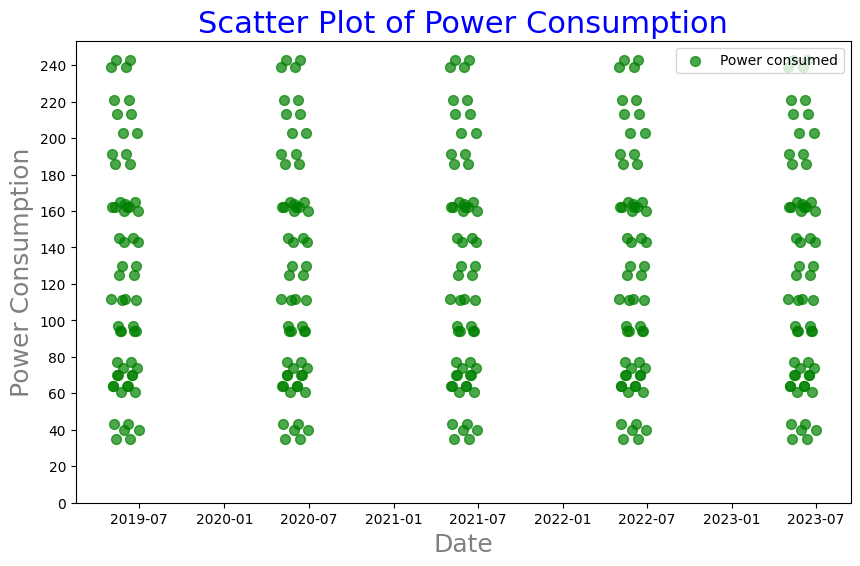

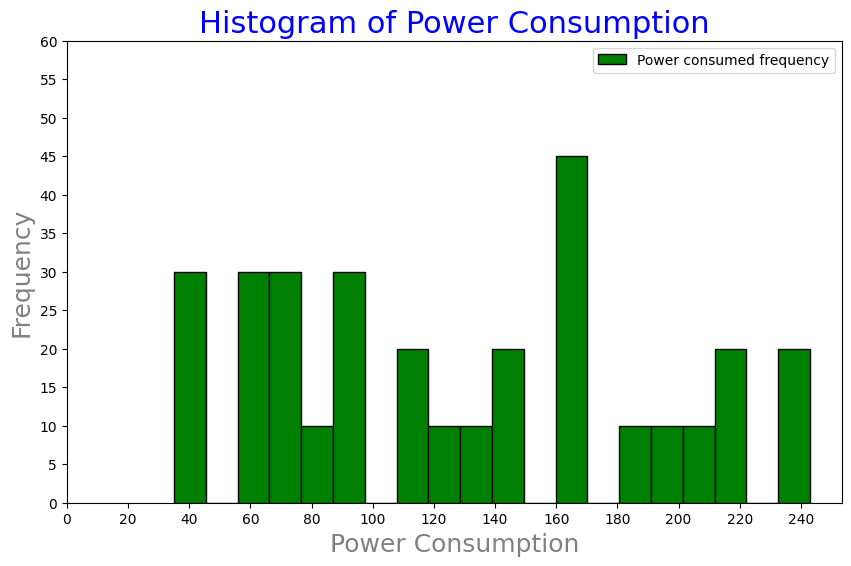

In [ ]:
# Step 2: Data Analysis and Visualization - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(power_data['timestamp'], power_data['power_consumption'], s=50, alpha=0.7, c='green')
plt.xlabel('Date', fontsize = 18, color = 'gray')
plt.ylabel('Power Consumption', fontsize = 18, color = 'gray')
plt.yticks(range(0,251,20))
plt.title('Scatter Plot of Power Consumption', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.legend(['Power consumed'], loc = 1)
plt.show()

# Step 3: Data Analysis and Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(power_data['power_consumption'], bins=20, edgecolor='black', color = 'green')
plt.xticks(range(0,251,20))
plt.yticks(range(0,61,5))
plt.xlabel('Power Consumption', fontsize = 18, color = 'gray')
plt.ylabel('Frequency', fontsize = 18, color = 'gray')
plt.title('Histogram of Power Consumption', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.legend(['Power consumed frequency'], loc = 1)
plt.show()

In [ ]:
power_data.set_index('timestamp', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


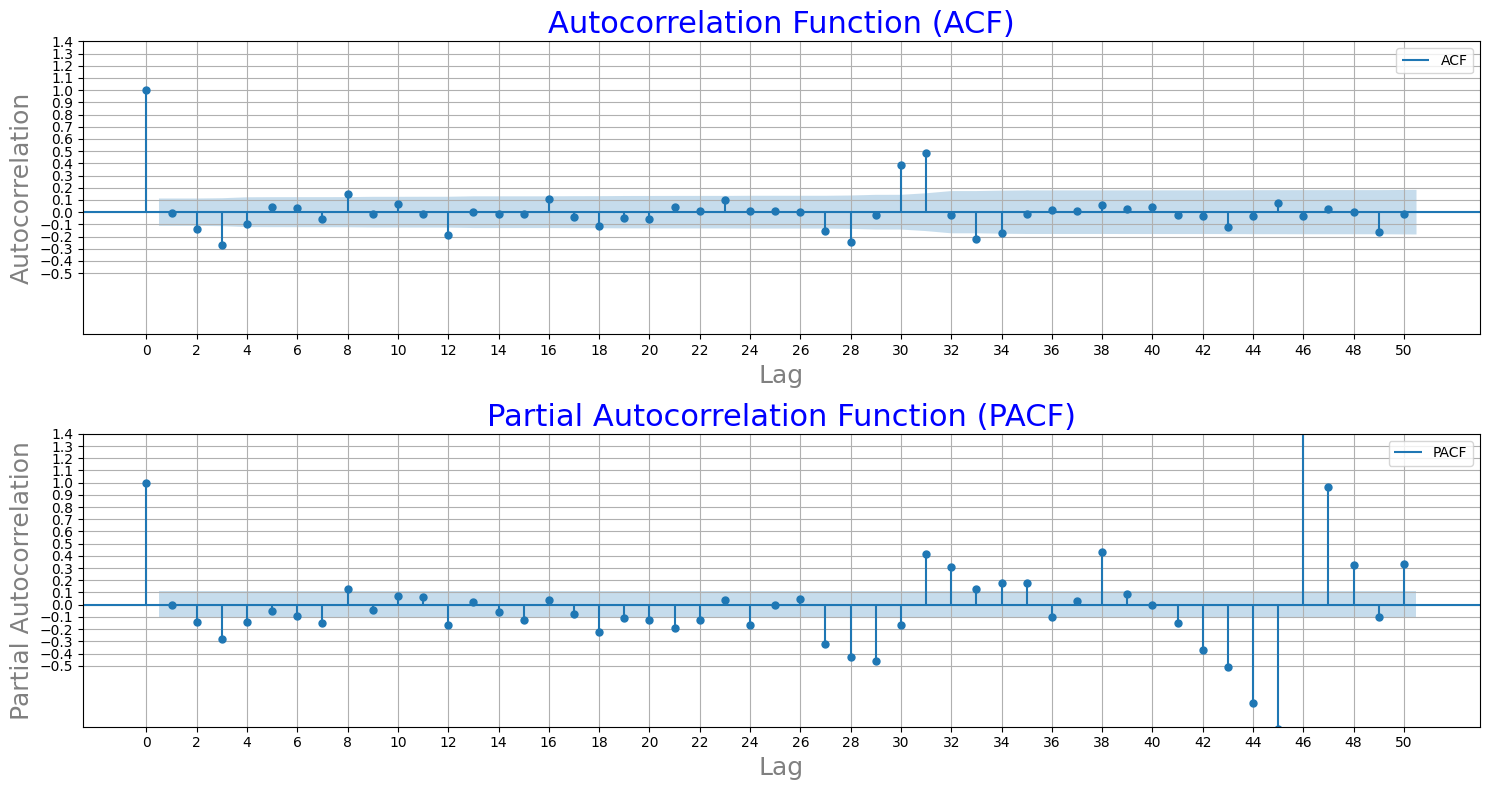

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
acf_plot = plot_acf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.xlabel('Lag', fontsize = 18, color ='gray')
plt.ylabel('Autocorrelation', fontsize = 18, color = 'gray')
plt.title('Autocorrelation Function (ACF)', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.xticks(np.arange(0, 51, 2))
plt.yticks(np.arange(-0.5, 1.5, 0.1))
plt.grid(True)
plt.legend(['ACF'], loc = 1)

plt.subplot(2, 1, 2)
pacf_plot = plot_pacf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.xlabel('Lag', fontsize = 18, color ='gray')
plt.ylabel('Partial Autocorrelation', fontsize = 18, color ='gray')
plt.title('Partial Autocorrelation Function (PACF)', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.xticks(np.arange(0, 51, 2))
plt.yticks(np.arange(-0.5, 1.5, 0.1))
plt.grid(True)
plt.legend(['PACF'], loc = 1)

plt.tight_layout()
plt.show()

In [ ]:
order = (1, 1, 0)           # ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

model = SARIMAX(power_data['power_consumption'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False)

# Step 7: Forecast power requirements for May/Jun 2024
forecast_period = 61  # 61 days for May and June 2024

# Extend the index to include future dates for May/Jun 2024
future_dates = pd.date_range(start='2024-05-01', periods=forecast_period, freq='D')
forecast = fitted_model.get_forecast(steps=forecast_period, index=future_dates)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


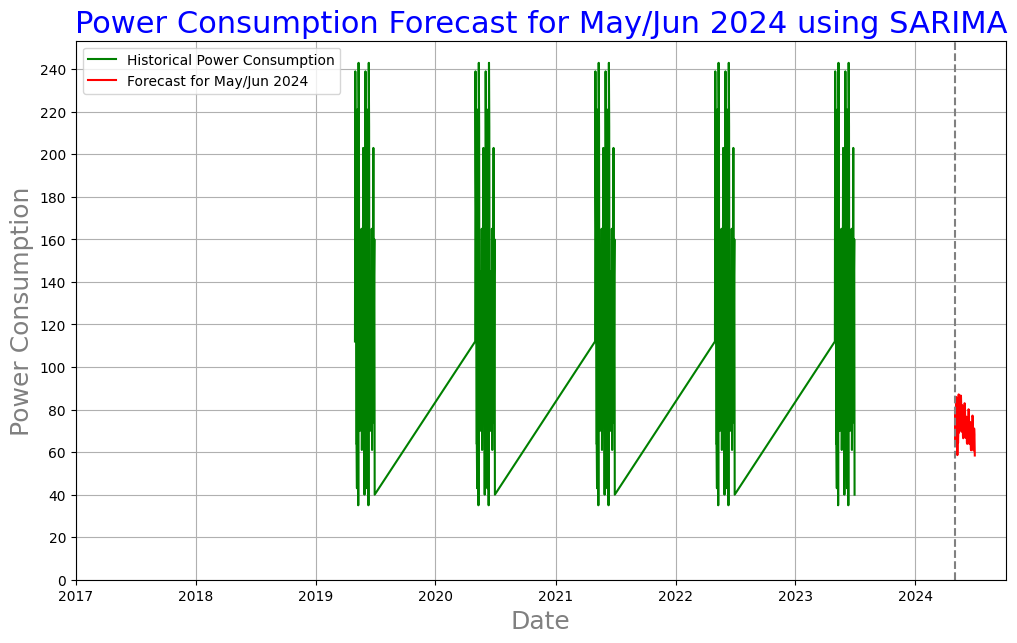

In [ ]:
# Step 8: Plot Forecast Results
plt.figure(figsize=(12, 7))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption', color = 'green')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date', fontsize = 18, color = 'gray')
plt.ylabel('Power Consumption', fontsize = 18, color = 'gray')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.legend()
plt.grid(True)

# Add a vertical line to indicate the separation between historical and forecasted data
plt.axvline(x=forecast_values.index[0], color='gray', linestyle='--')

# Set the x-axis range to show data from 2017 onwards
plt.xlim(pd.to_datetime('2017-01-01'))
plt.yticks(range(0,251,20))
plt.show()
output_file = 'forecasted_power_consumption.xlsx'
forecast_data = pd.DataFrame({'timestamp': forecast_values_series.index, 'forecasted_power_consumption': forecast_values_series})

# Convert the "timestamp" column to a pandas DateTime index in forecast_data
forecast_data['timestamp'] = pd.to_datetime(forecast_data['timestamp'])

# Format the timestamp column for better visibility in the Excel file
forecast_data['timestamp'] = forecast_data['timestamp'].dt.strftime('%Y-%m-%d')

# Convert the forecasted power consumption values to integers
forecast_data['forecasted_power_consumption'] = forecast_data['forecasted_power_consumption'].astype(int)

# Save the forecasted data to Excel file
forecast_data.to_excel(output_file, index=False)

In [ ]:
forecast_start_date = '2024-05-01'
forecast_end_date = '2024-06-30'

# Read the forecasted values from the Excel file
forecast_data = pd.read_excel('forecasted_power_consumption.xlsx')

# Convert the "timestamp" column to a pandas DateTime index in forecast_data
forecast_data['timestamp'] = pd.to_datetime(forecast_data['timestamp'])

# Set the "timestamp" column as the index for forecast_data
forecast_data.set_index('timestamp', inplace=True)

# Extract the forecasted and actual values for the forecast period
forecast_data_forecast_period = forecast_data.loc[forecast_start_date:forecast_end_date, 'forecasted_power_consumption']
actual_values_forecast_period = power_data.loc[forecast_start_date:forecast_end_date, 'power_consumption']

# Ensure both datasets have the same number of samples for the forecast period
forecast_data_forecast_period = forecast_data_forecast_period.reindex(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D'), fill_value=0)
actual_values_forecast_period = actual_values_forecast_period.reindex(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D'), fill_value=0)

mae = mean_absolute_error(actual_values_forecast_period, forecast_data_forecast_period)
rmse = np.sqrt(mean_squared_error(actual_values_forecast_period, forecast_data_forecast_period))

print(f"Mean Absolute Error (MAE) for the Forecast Period: {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) for the Forecast Period: {rmse:.2f}")








Mean Absolute Error (MAE) for the Forecast Period: 72.16
Root Mean Squared Error (RMSE) for the Forecast Period: 72.56


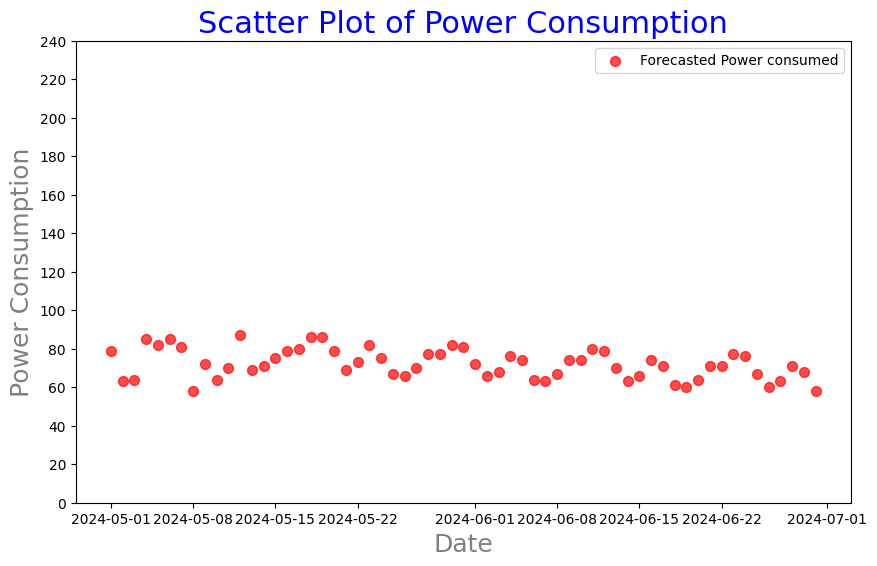

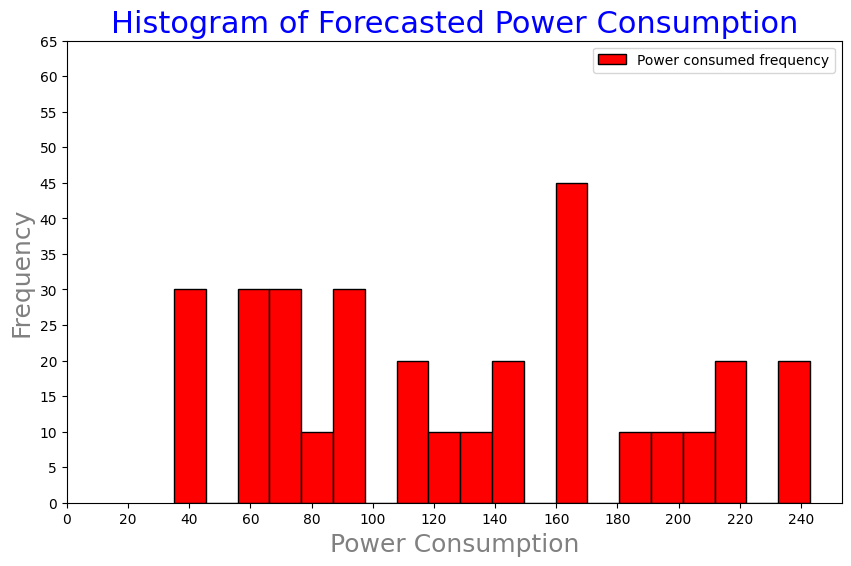

In [ ]:
forecast_data = pd.read_excel('forecasted_power_consumption.xlsx')

# Convert the "timestamp" column to a pandas DateTime index in forecast_data
forecast_data['timestamp'] = pd.to_datetime(forecast_data['timestamp'])
#Scatter plot of forecasted data:
plt.figure(figsize=(10, 6))
plt.scatter(forecast_data['timestamp'], forecast_data['forecasted_power_consumption'], s=50, alpha=0.7, c='red')
plt.xlabel('Date', fontsize = 18, color = 'gray')
plt.ylabel('Power Consumption', fontsize = 18, color = 'gray')
plt.yticks(range(0,251,20))
plt.title('Scatter Plot of Power Consumption', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.legend(['Forecasted Power consumed'], loc = 1)
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(power_data['power_consumption'], bins=20, edgecolor='black', color = 'red')
plt.xticks(range(0,251,20))
plt.yticks(range(0,70,5))
plt.xlabel('Power Consumption', fontsize = 18, color = 'gray')
plt.ylabel('Frequency', fontsize = 18, color = 'gray')
plt.title('Histogram of Forecasted Power Consumption', fontsize = 22, fontname = 'Calibri', color = 'blue')
plt.legend(['Power consumed frequency'], loc = 1)
plt.show()